-------------------------------------------Heart Diseases Prediction------------------------------------------------------
--

Data Description
--

<p>A disease is an unnatural medical condition that negatively affects the functional state of an organism and is generally associated with certain signs of illness. As reported by World Health Organization (WHO), Heart Disease and Stroke are the world’s biggest killers and have remained the leading causes of death globally in the last 15 years. In the direction of predicting heart disease, Machine Learning can present remarkable features that simplify the identification of unseen patterns, eventually providing clinical insights that assist physicians in planning and providing care.</p>

<p>This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.<p>
<p>Based on the given 13 attributes we need to predict whether the person is affected by heart disease or not.</p>

<h2>Attribute Information:</h2>

<h3>Binary</h3>
<ol>
    <li>sex (0 = female; 1 = male)</li>
    <li>fbs: Fasting blood sugar > 120 mg/dl</li>
    <li>exang: Exercise induced angina (0 = no; 1 = yes)</li>
</ol>

<h3>Categorical</h3>
<ol>
    <li>cp: Chest pain type (0 = Typical angina; 1 = Atypical angina; 2 = Non-angina; 3 = Asymptomatic angina)</li>
    <li>restecg: Resting ECG ( 0 = Normal; 1 = ST-T wave abnormality;2 = Left ventricular hypertrophy)</li>
    <li>slope: Slope of the peak exercise ST segment (0 = upsloping; 1 = flat ;2 = downsloping)</li>
    <li>thal: Thalium stress test result (0 = NA; 1 = Fixed defect; 2 = Normal; 3 = Reversible defect)</li>
</ol>
 
<h3>Ordinal</h3>
<ol>
    <li>ca: number of major vessels (0-3) colored by flourosopy</li>
</ol>

<h3>Numeric</h3>
<ol>
    <li>age</li>
    <li>oldpeak: ST depression induced by exercise relative to rest</li>
    <li>trestbps: Resting blood pressure</li>
    <li>chol: Serum cholestoral in mg/dl</li>
    <li>thalach: Maximum heart rate achieved during thalium stress test</li>
</ol>
 
<h3>Target</h3>
<ol>
    <li>target: 1 = heart disease; 0 = no heart disease</li>
<ol>


Importing the Libraries
--

In [1]:
import numpy as np #To perform numerical claculations
import pandas as pd #To analyze the data
import matplotlib.pyplot as plt #To visualise the data
import seaborn as sns #To visualise the data
import warnings
warnings.simplefilter("ignore")
sns.set()

Importing the Datasets
--

In [2]:
dataset=pd.read_csv('heart.csv') #To read the given dataset by using pandas library
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
dataset.info() #To get the information about given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
dataset.isnull().sum() #Checking for null values in the dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
dataset['target'].value_counts() #To get the count of affected and non-affected people.(1=affected,0=non-affected)

1    526
0    499
Name: target, dtype: int64

In [6]:
dataset['sex'].value_counts() #To get the count of male and female in the dataset.(1=male,0=female)

1    713
0    312
Name: sex, dtype: int64

Visualising the Categorical Data
--

<AxesSubplot:xlabel='target', ylabel='count'>

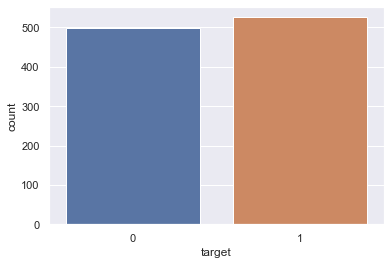

In [7]:
sns.countplot(x='target',data=dataset)  #Visulaising the target column by using countplot.(1=affected,0=non-affected)

<AxesSubplot:xlabel='sex', ylabel='count'>

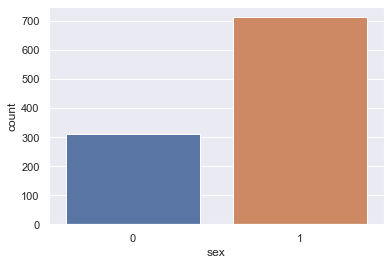

In [8]:
sns.countplot(x='sex',data=dataset)  #Visulaising the sex column by using countplot.(1=male,0=female) 

<AxesSubplot:xlabel='sex', ylabel='count'>

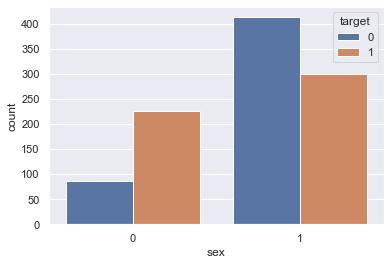

In [9]:
sns.countplot(x='sex',hue='target',data=dataset) #Visulaising the sex column based on target values.

<AxesSubplot:xlabel='cp', ylabel='count'>

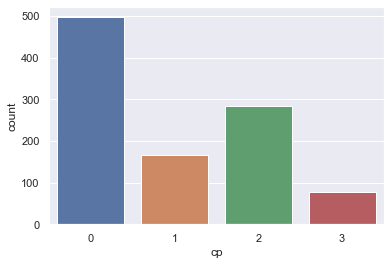

In [10]:
sns.countplot(x='cp',data=dataset)#Visualising the chest pain type column(0=typical angina1,1=atypical angina,2=non-anginal pain,3=asymptomatic)

<AxesSubplot:xlabel='cp', ylabel='count'>

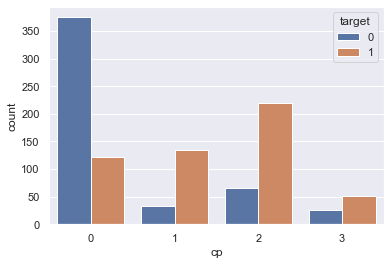

In [11]:
sns.countplot(x='cp',hue='target',data=dataset) #Visulaising the chest pain type column based on target values.

<AxesSubplot:xlabel='fbs', ylabel='count'>

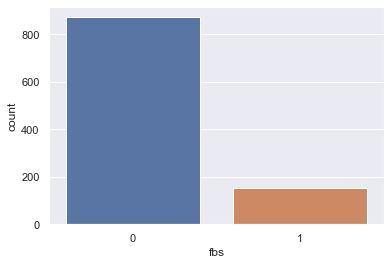

In [12]:
sns.countplot(x='fbs',data=dataset) #Visulaising the fasting blood sugar column(Fasting blood sugar > 120 1=true,0=false)

<AxesSubplot:xlabel='fbs', ylabel='count'>

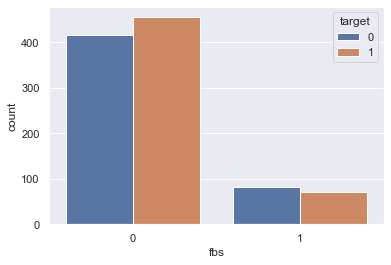

In [13]:
sns.countplot(x='fbs',hue='target',data=dataset) ##Visulaising the fast blood sugar column based on target values.

<AxesSubplot:xlabel='restecg', ylabel='count'>

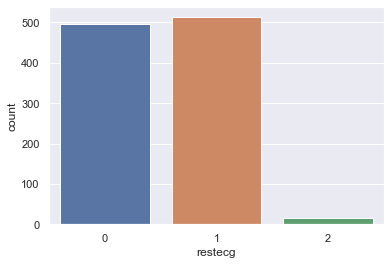

In [14]:
sns.countplot(x='restecg',data=dataset) #Visualising resting electro cardiographic results column(0=normal,1=having ST-T(abnormal),2=hypertrophy)

<AxesSubplot:xlabel='restecg', ylabel='count'>

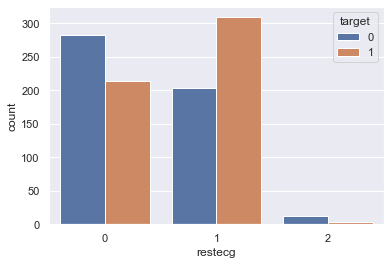

In [15]:
sns.countplot(x='restecg',hue='target',data=dataset) #Visualising resting electro cardiographic results based on target values

<AxesSubplot:xlabel='exang', ylabel='count'>

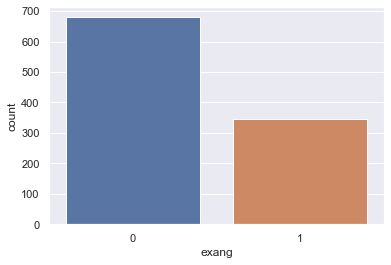

In [16]:
sns.countplot(x='exang',data=dataset) #Visualising the excersie induced angina column(1=yes,0=no)

<AxesSubplot:xlabel='exang', ylabel='count'>

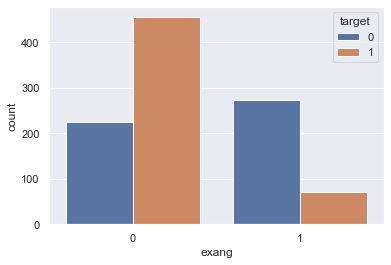

In [17]:
sns.countplot(x='exang',hue='target',data=dataset) #Visualising the exercise induced angina based on target values

<AxesSubplot:xlabel='slope', ylabel='count'>

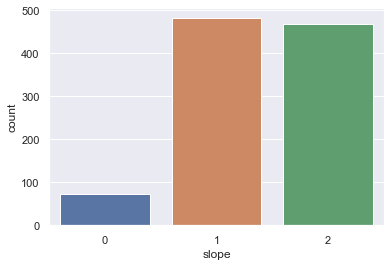

In [18]:
sns.countplot(x='slope',data=dataset) #Visualsing slope column(0=upsloping,1=flat,2=downsloping)

<AxesSubplot:xlabel='slope', ylabel='count'>

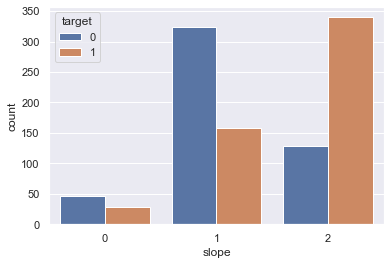

In [19]:
sns.countplot(x='slope',hue='target',data=dataset) #Visualising slope column with target variable

<AxesSubplot:xlabel='ca', ylabel='count'>

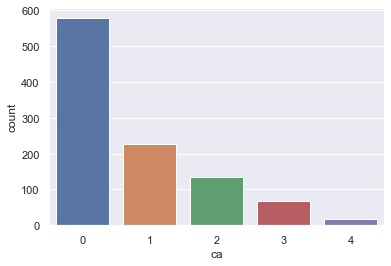

In [20]:
sns.countplot(x='ca',data=dataset) #Visualsing ca column(number of major vesssels coloured by flurospy)

<AxesSubplot:xlabel='ca', ylabel='count'>

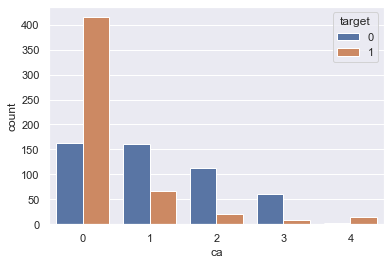

In [21]:
sns.countplot(x='ca',hue='target',data=dataset) #Visualising ca column(number of major vesssels coloured by flurospy) with target variable

<AxesSubplot:xlabel='thal', ylabel='count'>

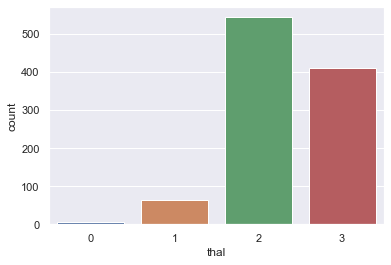

In [22]:
sns.countplot(x='thal',data=dataset) #visualising thal column

<AxesSubplot:xlabel='thal', ylabel='count'>

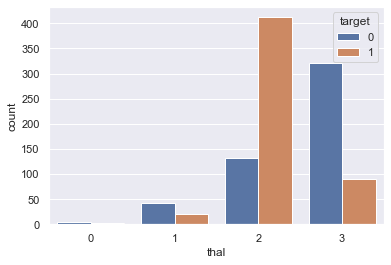

In [23]:
sns.countplot(x='thal',hue='target',data=dataset) #visualising thal column with target values

Visualising the Numerical Data
--

(array([  4.,  39., 109., 125., 120., 205., 219., 149.,  46.,   9.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

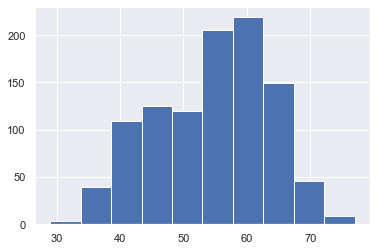

In [24]:
plt.hist(x='age',data=dataset) #Visualising age column using histogram

(array([ 33., 140., 232., 251., 192.,  89.,  43.,  28.,  10.,   7.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <BarContainer object of 10 artists>)

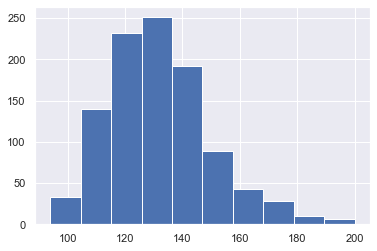

In [25]:
plt.hist(x='trestbps',data=dataset) #Visualising trestbps(resting blood pressure) column

(array([ 42., 247., 359., 231., 120.,  10.,  13.,   0.,   0.,   3.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <BarContainer object of 10 artists>)

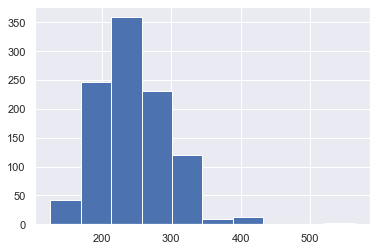

In [26]:
plt.hist(x='chol',data=dataset) #Visualising cholestral column

(array([  4.,  21.,  39.,  87., 127., 180., 255., 212.,  83.,  17.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <BarContainer object of 10 artists>)

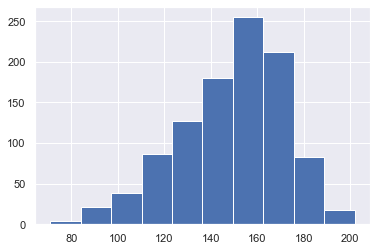

In [27]:
plt.hist(x='thalach',data=dataset) #Visualising thalach(maximum heart rate) column

(array([491., 172., 136.,  83.,  70.,  40.,  22.,   4.,   0.,   7.]),
 array([0.  , 0.62, 1.24, 1.86, 2.48, 3.1 , 3.72, 4.34, 4.96, 5.58, 6.2 ]),
 <BarContainer object of 10 artists>)

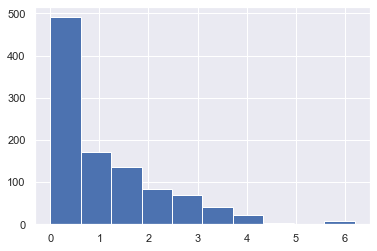

In [28]:
plt.hist(x='oldpeak',data=dataset) #Visualising oldpeak column

Performing Correlation
--

<AxesSubplot:>

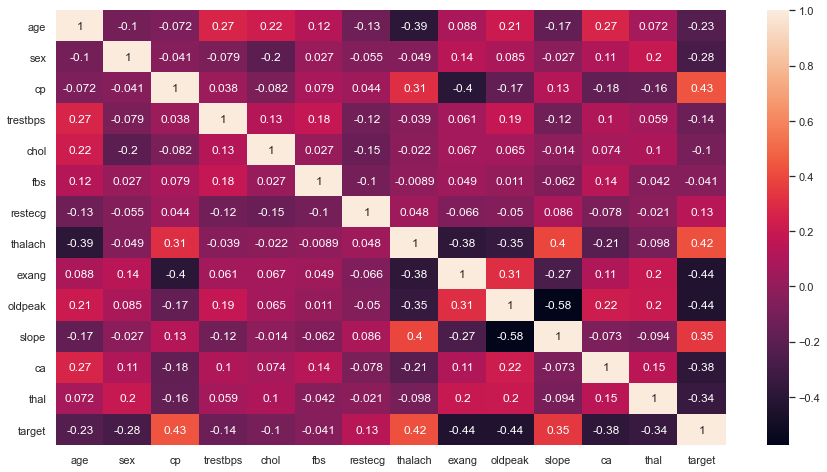

In [29]:
corr=dataset.corr() #Calling correlation function
plt.figure(figsize=(15,8)) #Increasing the figuresize for better visualisation
sns.heatmap(corr,annot=True) #Visualising the correlation within the columns

Separating Input Features and Target Values
--

In [30]:
dataset.columns #Displaying the list of column names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [31]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [32]:
pd.set_option('display.max_columns',None) #Setting to display maximum column width

In [33]:
categirical_column=['sex','cp','fbs','restecg','exang','slope','ca','thal'] #Making list of categroical columns
numerical_column=['age','trestbps','chol','thalach','oldpeak']
new_df=pd.get_dummies(dataset,columns=categirical_column,drop_first=True) #Converting categorical data to dummy variable
new_df[numerical_column].corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.271121,0.219823,-0.390227,0.208137
trestbps,0.271121,1.000000,0.127977,-0.039264,0.187434
chol,0.219823,0.127977,1.000000,-0.021772,0.064880
thalach,-0.390227,-0.039264,-0.021772,1.000000,-0.349796
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000


In [34]:
new_df

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
1021,60,125,258,141,2.8,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1
1022,47,110,275,118,1.0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0
1023,50,110,254,159,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [35]:
X=new_df.drop(['target'],axis=1).values #Input Features
y=new_df['target'].values #Target Values

In [36]:
X

array([[ 52., 125., 212., ...,   0.,   0.,   1.],
       [ 53., 140., 203., ...,   0.,   0.,   1.],
       [ 70., 145., 174., ...,   0.,   0.,   1.],
       ...,
       [ 47., 110., 275., ...,   0.,   1.,   0.],
       [ 50., 110., 254., ...,   0.,   1.,   0.],
       [ 54., 120., 188., ...,   0.,   0.,   1.]])

In [37]:
X.shape #Displaying the shape of input features

(1025, 22)

In [38]:
y.shape #Displaying the shape of target values

(1025,)

In [39]:
X

array([[ 52., 125., 212., ...,   0.,   0.,   1.],
       [ 53., 140., 203., ...,   0.,   0.,   1.],
       [ 70., 145., 174., ...,   0.,   0.,   1.],
       ...,
       [ 47., 110., 275., ...,   0.,   1.,   0.],
       [ 50., 110., 254., ...,   0.,   1.,   0.],
       [ 54., 120., 188., ...,   0.,   0.,   1.]])

In [40]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

Performing Train Test Split on Dataset
--

In [41]:
from sklearn.model_selection import train_test_split #Importing train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.30,stratify=y) #Splitting train and test data

In [43]:
X_train

array([[ 57., 154., 232., ...,   0.,   1.,   0.],
       [ 62., 140., 394., ...,   0.,   1.,   0.],
       [ 64., 180., 325., ...,   0.,   1.,   0.],
       ...,
       [ 62., 160., 164., ...,   0.,   0.,   1.],
       [ 53., 123., 282., ...,   0.,   0.,   1.],
       [ 39., 138., 220., ...,   0.,   1.,   0.]])

In [44]:
X_test

array([[ 40., 152., 223., ...,   0.,   0.,   1.],
       [ 43., 132., 247., ...,   0.,   0.,   1.],
       [ 47., 138., 257., ...,   0.,   1.,   0.],
       ...,
       [ 41., 105., 198., ...,   0.,   1.,   0.],
       [ 62., 140., 268., ...,   0.,   1.,   0.],
       [ 52., 128., 204., ...,   0.,   0.,   0.]])

Feature Scaling
--

In [45]:
#numerical_column=['age','trestbps','chol','thalach','oldpeak']
from sklearn.preprocessing import StandardScaler #Importing standardscaler
sc = StandardScaler() #Creating a object for StandardScaler
X_train[:,0:5] = sc.fit_transform(X_train[:,0:5]) #Scaling the X-train values for numerical data
X_test[:,0:5] = sc.transform(X_test[:,0:5]) #Scaling the X-test values for numerical data
 



In [46]:
X_train

array([[ 0.26624007,  1.24602543, -0.32536617, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.81415665,  0.45012322,  2.79850406, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.03332328,  2.72412954,  1.46796674, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.81415665,  1.58712638, -1.63662034, ...,  0.        ,
         0.        ,  1.        ],
       [-0.17209318, -0.51632947,  0.63879131, ...,  0.        ,
         0.        ,  1.        ],
       [-1.70625958,  0.3364229 , -0.55676396, ...,  0.        ,
         1.        ,  0.        ]])

In [47]:
X_test

array([[-1.59667627,  1.13232512, -0.49891452, ...,  0.        ,
         0.        ,  1.        ],
       [-1.26792633, -0.00467805, -0.03611893, ...,  0.        ,
         0.        ,  1.        ],
       [-0.82959307,  0.3364229 ,  0.15671257, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.48709296, -1.53963232, -0.98099325, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.81415665,  0.45012322,  0.36882721, ...,  0.        ,
         1.        ,  0.        ],
       [-0.2816765 , -0.23207868, -0.86529436, ...,  0.        ,
         0.        ,  0.        ]])

Training the Dataset on different Classification Algorithm
--

<h3>1. Logistic Regression</h3>


In [48]:
from sklearn.linear_model import LogisticRegression #Importing Logistic Regression Model

In [49]:
lr=LogisticRegression() #Creating a object for Logistic Regression Model

In [50]:
lr.fit(X_train,y_train) #Fitting the data

LogisticRegression()

In [51]:
print("Score is :",lr.score(X_test,y_test)*100) #Test dataset score

Score is : 87.33766233766234


In [52]:
print("Score is :",lr.score(X_train,y_train)*100) #Train dataset score

Score is : 88.14504881450488


In [53]:
y_predict=lr.predict(X_test) #Predicting test set results
np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1) #Comparing y_predict and y_test values
print(X_test.shape)

(308, 22)


In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,plot_confusion_matrix
print('\nConfusion Matrix is: \n' ,confusion_matrix(y_test,y_predict)) #Confusion Matrix
print('\nAccuracy Score is : \n',accuracy_score(y_test,y_predict)*100) #Accuracy Score
print('\nClassification Report is :\n',classification_report(y_test,y_predict)) #Classification Report



Confusion Matrix is: 
 [[130  20]
 [ 19 139]]

Accuracy Score is : 
 87.33766233766234

Classification Report is :
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       150
           1       0.87      0.88      0.88       158

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



In [55]:
input_data0=(54,120,188,113,1.4)
print(input_data0)
input_data_numpy0=np.asarray(input_data0)
print(input_data_numpy0)
input_data_reshpae0=input_data_numpy0.reshape(1,-1)
print(input_data_reshpae0)
std_data=sc.transform(input_data_reshpae0)
print(std_data)

input_data1=(1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1)
print(input_data1)
input_data_numpy1=np.asarray(input_data1)
print(input_data_numpy1)
input_data_reshpae1=input_data_numpy1.reshape(1,-1)
print(input_data_reshpae1)
#std_data.extend(input_data_reshpae1)
#output=lr.predict(input_data_reshpae1)
output = np.hstack([std_data,input_data_reshpae1])
result=lr.predict(output)
result



(54, 120, 188, 113, 1.4)
[ 54.  120.  188.  113.    1.4]
[[ 54.  120.  188.  113.    1.4]]
[[-0.06250987 -0.68687994 -1.17382475 -1.61195989  0.27783048]]
(1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1)
[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]
[[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]]


array([0], dtype=int64)

<h3>2. K-Nearest Neighbours</h3>

In [56]:
from sklearn.neighbors import KNeighborsClassifier #Importing KNeighbors Classifier Model

In [57]:
knc=KNeighborsClassifier() #Creating a object for KNeighbors Classifier Model

In [58]:
knc.fit(X_train,y_train) #Fitting the data

KNeighborsClassifier()

In [59]:
print("Score is :",knc.score(X_test,y_test)*100) #Test dataset score

Score is : 85.06493506493507


In [60]:
print("Score is :",knc.score(X_train,y_train)*100) #Train dataset score

Score is : 93.58437935843794


In [61]:
y_predict=knc.predict(X_test) #Predicting test set results
np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1) #Comparing y_predict and y_test values

array([[1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1,

In [62]:
print('\nConfusion Matrix is: \n' ,confusion_matrix(y_test,y_predict)) #Confusion Matrix
print('\nAccuracy Score is : \n',accuracy_score(y_test,y_predict)*100) #Accuracy Score
print('\nClassification Report is :\n',classification_report(y_test,y_predict)) #Classification Report


Confusion Matrix is: 
 [[121  29]
 [ 17 141]]

Accuracy Score is : 
 85.06493506493507

Classification Report is :
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       150
           1       0.83      0.89      0.86       158

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



In [63]:
input_data0=(54,120,188,113,1.4)
print(input_data0)
input_data_numpy0=np.asarray(input_data0)
print(input_data_numpy0)
input_data_reshpae0=input_data_numpy0.reshape(1,-1)
print(input_data_reshpae0)
std_data=sc.transform(input_data_reshpae0)
print(std_data)

input_data1=(1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1)
print(input_data1)
input_data_numpy1=np.asarray(input_data1)
print(input_data_numpy1)
input_data_reshpae1=input_data_numpy1.reshape(1,-1)
print(input_data_reshpae1)
#std_data.extend(input_data_reshpae1)
#output=lr.predict(input_data_reshpae1)
output = np.hstack([std_data,input_data_reshpae1])
result=knc.predict(output)
result

(54, 120, 188, 113, 1.4)
[ 54.  120.  188.  113.    1.4]
[[ 54.  120.  188.  113.    1.4]]
[[-0.06250987 -0.68687994 -1.17382475 -1.61195989  0.27783048]]
(1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1)
[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]
[[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]]


array([0], dtype=int64)

<h3>3. Decision Tree Classifier</h3>

In [64]:
from sklearn.tree import DecisionTreeClassifier #Importing Decision Tree Classifier Model

In [65]:
dct=DecisionTreeClassifier() #Creating a object for Decision Tree Classifier Model

In [66]:
dct.fit(X_train,y_train) #Fitting the data

DecisionTreeClassifier()

In [67]:
print("Score is :",dct.score(X_test,y_test)*100) #Test dataset score

Score is : 96.1038961038961


In [68]:
print("Score is :",dct.score(X_train,y_train)*100) #Train dataset score

Score is : 100.0


In [69]:
y_predict=dct.predict(X_test) #Predicting Test Set results
np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1)  #Comparing y_predict and y_test values

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1,

In [70]:
print('\nConfusion Matrix is: \n' ,confusion_matrix(y_test,y_predict)) #Confusion Matrix
print('\nAccuracy Score is : \n',accuracy_score(y_test,y_predict)*100) #Accuracy Score
print('\nClassification Report is :\n',classification_report(y_test,y_predict)) #Classification Report


Confusion Matrix is: 
 [[147   3]
 [  9 149]]

Accuracy Score is : 
 96.1038961038961

Classification Report is :
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       150
           1       0.98      0.94      0.96       158

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



In [71]:
input_data0=(54,120,188,113,1.4)
print(input_data0)
input_data_numpy0=np.asarray(input_data0)
print(input_data_numpy0)
input_data_reshpae0=input_data_numpy0.reshape(1,-1)
print(input_data_reshpae0)
std_data=sc.transform(input_data_reshpae0)
print(std_data)

input_data1=(1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1)
print(input_data1)
input_data_numpy1=np.asarray(input_data1)
print(input_data_numpy1)
input_data_reshpae1=input_data_numpy1.reshape(1,-1)
print(input_data_reshpae1)
#std_data.extend(input_data_reshpae1)
#output=lr.predict(input_data_reshpae1)
output = np.hstack([std_data,input_data_reshpae1])
result=dct.predict(output)
result

(54, 120, 188, 113, 1.4)
[ 54.  120.  188.  113.    1.4]
[[ 54.  120.  188.  113.    1.4]]
[[-0.06250987 -0.68687994 -1.17382475 -1.61195989  0.27783048]]
(1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1)
[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]
[[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]]


array([0], dtype=int64)

<h3>4. Random Forest Classifier</h3>


In [72]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Model

In [73]:
rfc=RandomForestClassifier() #Creating a object for Random Forest Classifier Model

In [74]:
rfc.fit(X_train,y_train) #Fitting the data

RandomForestClassifier()

In [75]:
print("Score is :",rfc.score(X_test,y_test)*100) #Test dataset score

Score is : 99.02597402597402


In [76]:
print("Score is :",rfc.score(X_train,y_train)*100) #Train dataset score

Score is : 100.0


In [77]:
y_predict=rfc.predict(X_test) #Predicting Test Set Results
np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1) #Comparing y_predict and y_test values

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1,

In [78]:
print('\nConfusion Matrix is: \n' ,confusion_matrix(y_test,y_predict)) #Confusion Matrix
print('\nAccuracy Score is : \n',accuracy_score(y_test,y_predict)*100) #Accuracy Score
print('\nClassification Report is :\n',classification_report(y_test,y_predict)) #Classification Report


Confusion Matrix is: 
 [[150   0]
 [  3 155]]

Accuracy Score is : 
 99.02597402597402

Classification Report is :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [79]:
input_data0=(54,120,188,113,1.4)
print(input_data0)
input_data_numpy0=np.asarray(input_data0)
print(input_data_numpy0)
input_data_reshpae0=input_data_numpy0.reshape(1,-1)
print(input_data_reshpae0)
std_data=sc.transform(input_data_reshpae0)
print(std_data)

input_data1=(1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1)
print(input_data1)
input_data_numpy1=np.asarray(input_data1)
print(input_data_numpy1)
input_data_reshpae1=input_data_numpy1.reshape(1,-1)
print(input_data_reshpae1)
#std_data.extend(input_data_reshpae1)
#output=lr.predict(input_data_reshpae1)
output = np.hstack([std_data,input_data_reshpae1])
result=rfc.predict(output)
result

(54, 120, 188, 113, 1.4)
[ 54.  120.  188.  113.    1.4]
[[ 54.  120.  188.  113.    1.4]]
[[-0.06250987 -0.68687994 -1.17382475 -1.61195989  0.27783048]]
(1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1)
[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]
[[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]]


array([0], dtype=int64)

<h3>5. Gradient Boosting Classifier</h3>

In [80]:
from sklearn.ensemble import GradientBoostingClassifier #Importing Gradient Boosting Classifier Model

In [81]:
gbc=GradientBoostingClassifier() #Creating a object for Gradient Boosting Classifier Model

In [82]:
gbc.fit(X_train,y_train) #Fitting the data

GradientBoostingClassifier()

In [83]:
print("Score is :",gbc.score(X_test,y_test)*100) #Test dataset score

Score is : 96.42857142857143


In [84]:
print("Score is :",gbc.score(X_train,y_train)*100) #Train dataset score

Score is : 99.30264993026499


In [85]:
y_predict=gbc.predict(X_test) #Predicting Test Set Results
np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1)  #Comparing y_predict and y_test values

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1,

In [86]:
print('\nConfusion Matrix is: \n' ,confusion_matrix(y_test,y_predict)) #Confusion Matrix
print('\nAccuracy Score is : \n',accuracy_score(y_test,y_predict)*100) #Accuracy Score
print('\nClassification Report is :\n',classification_report(y_test,y_predict)) #Classification Report


Confusion Matrix is: 
 [[145   5]
 [  6 152]]

Accuracy Score is : 
 96.42857142857143

Classification Report is :
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       150
           1       0.97      0.96      0.97       158

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



In [87]:
input_data0=(54,120,188,113,1.4)
print(input_data0)
input_data_numpy0=np.asarray(input_data0)
print(input_data_numpy0)
input_data_reshpae0=input_data_numpy0.reshape(1,-1)
print(input_data_reshpae0)
std_data=sc.transform(input_data_reshpae0)
print(std_data)

input_data1=(1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1)
print(input_data1)
input_data_numpy1=np.asarray(input_data1)
print(input_data_numpy1)
input_data_reshpae1=input_data_numpy1.reshape(1,-1)
print(input_data_reshpae1)
#std_data.extend(input_data_reshpae1)
#output=lr.predict(input_data_reshpae1)
output = np.hstack([std_data,input_data_reshpae1])
result=gbc.predict(output)
result

(54, 120, 188, 113, 1.4)
[ 54.  120.  188.  113.    1.4]
[[ 54.  120.  188.  113.    1.4]]
[[-0.06250987 -0.68687994 -1.17382475 -1.61195989  0.27783048]]
(1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1)
[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]
[[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]]


array([0], dtype=int64)

<h3>6. Gaussian NB</h3>

In [88]:
from sklearn.naive_bayes import GaussianNB #Importing Gaussian NB Model

In [89]:
gnb=GaussianNB() #Creating a object for Gradient Boosting Classifier Model

In [90]:
gnb.fit(X_train,y_train) #Fitting the data

GaussianNB()

In [91]:
print("Score is :",gnb.score(X_test,y_test)*100)  #Test dataset score

Score is : 71.75324675324676


In [92]:
print("Score is :",gnb.score(X_train,y_train)*100)  #Train dataset score

Score is : 72.94281729428172


In [93]:
y_predict=gnb.predict(X_test) #Predicting Test Set Results
np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1) #Comparing y_predict and y_test values

array([[0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1,

In [94]:
print('\nConfusion Matrix is: \n' ,confusion_matrix(y_test,y_predict)) #Confusion Matrix
print('\nAccuracy Score is : \n',accuracy_score(y_test,y_predict)*100) #Accuracy Score
print('\nClassification Report is :\n',classification_report(y_test,y_predict)) #Classification Report


Confusion Matrix is: 
 [[143   7]
 [ 80  78]]

Accuracy Score is : 
 71.75324675324676

Classification Report is :
               precision    recall  f1-score   support

           0       0.64      0.95      0.77       150
           1       0.92      0.49      0.64       158

    accuracy                           0.72       308
   macro avg       0.78      0.72      0.70       308
weighted avg       0.78      0.72      0.70       308



In [95]:
input_data0=(54,120,188,113,1.4)
print(input_data0)
input_data_numpy0=np.asarray(input_data0)
print(input_data_numpy0)
input_data_reshpae0=input_data_numpy0.reshape(1,-1)
print(input_data_reshpae0)
std_data=sc.transform(input_data_reshpae0)
print(std_data)

input_data1=(1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1)
print(input_data1)
input_data_numpy1=np.asarray(input_data1)
print(input_data_numpy1)
input_data_reshpae1=input_data_numpy1.reshape(1,-1)
print(input_data_reshpae1)
#std_data.extend(input_data_reshpae1)
#output=lr.predict(input_data_reshpae1)
output = np.hstack([std_data,input_data_reshpae1])
result=gnb.predict(output)
result

(54, 120, 188, 113, 1.4)
[ 54.  120.  188.  113.    1.4]
[[ 54.  120.  188.  113.    1.4]]
[[-0.06250987 -0.68687994 -1.17382475 -1.61195989  0.27783048]]
(1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1)
[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]
[[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]]


array([0], dtype=int64)

<h3>7. Support Vector Classifier</h3>

In [96]:
from sklearn.svm import SVC #Importing Support Vector Classifier Model

In [97]:
svc=SVC() #Creating a object for Support Vector Classifier Mode
svc.fit(X_train,y_train) #Fitting the data

SVC()

In [98]:
print("Score is :",svc.score(X_test,y_test)*100) #Test dataset score

Score is : 93.18181818181817


In [99]:
print("Score is :",svc.score(X_train,y_train)*100) #Train dataset score

Score is : 95.25801952580196


In [100]:
y_predict=svc.predict(X_test) #Predicting Test Set Results
np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1) #Comparing y_predict and y_test values

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1,

In [101]:
print('\nConfusion Matrix is: \n' ,confusion_matrix(y_test,y_predict)) #Confusion Matrix
print('\nAccuracy Score is : \n',accuracy_score(y_test,y_predict)*100) #Accuracy Score
print('\nClassification Report is :\n',classification_report(y_test,y_predict)) #Classification Report


Confusion Matrix is: 
 [[141   9]
 [ 12 146]]

Accuracy Score is : 
 93.18181818181817

Classification Report is :
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       150
           1       0.94      0.92      0.93       158

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308



In [102]:
input_data0=(54,120,188,113,1.4)
print(input_data0)
input_data_numpy0=np.asarray(input_data0)
print(input_data_numpy0)
input_data_reshpae0=input_data_numpy0.reshape(1,-1)
print(input_data_reshpae0)
std_data=sc.transform(input_data_reshpae0)
print(std_data)

input_data1=(1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1)
print(input_data1)
input_data_numpy1=np.asarray(input_data1)
print(input_data_numpy1)
input_data_reshpae1=input_data_numpy1.reshape(1,-1)
print(input_data_reshpae1)
#std_data.extend(input_data_reshpae1)
#output=lr.predict(input_data_reshpae1)
output = np.hstack([std_data,input_data_reshpae1])
result=svc.predict(output)
result

(54, 120, 188, 113, 1.4)
[ 54.  120.  188.  113.    1.4]
[[ 54.  120.  188.  113.    1.4]]
[[-0.06250987 -0.68687994 -1.17382475 -1.61195989  0.27783048]]
(1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1)
[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]
[[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]]


array([0], dtype=int64)

Visualising Accuracy Score for Classification Algorithms
--

Text(0.5, 1.0, 'Accuracy Score of Classification Algorithms')

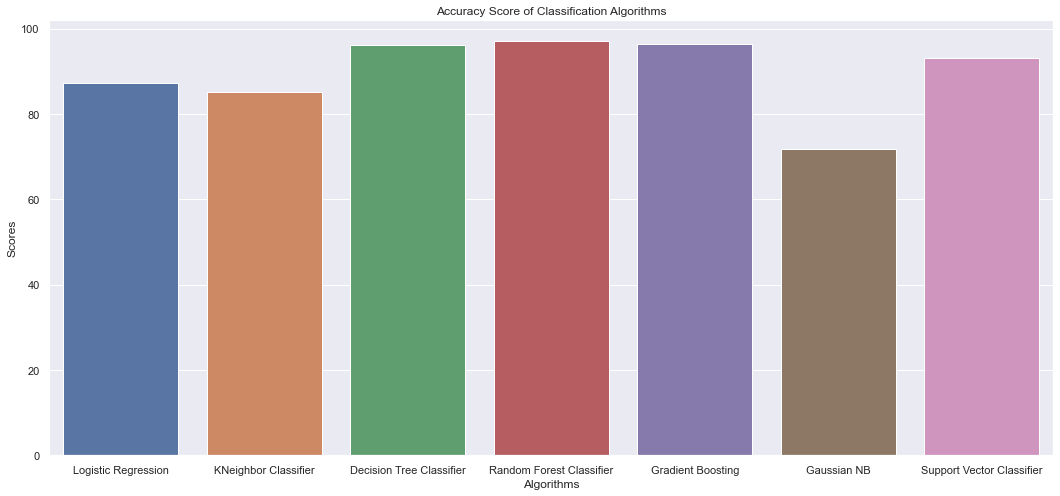

In [103]:
logistic=lr.fit(X_train,y_train)
logistic_score=logistic.score(X_test,y_test)*100 #Logistic Regression Score

kneighbor=knc.fit(X_train,y_train)
kneighbor_score=kneighbor.score(X_test,y_test)*100 #KNeighbors Classifier Score

decision=dct.fit(X_train,y_train)
decision_score=decision.score(X_test,y_test)*100 #Decision Tree Classifier Score

random=rfc.fit(X_train,y_train)
random_score=random.score(X_test,y_test)*100 #Random Forest Classifier Score


gradient=gbc.fit(X_train,y_train)
gradient_score=gradient.score(X_test,y_test)*100 #Gradient Boosting Socre

gaussian=gnb.fit(X_train,y_train)
gaussian_score=gaussian.score(X_test,y_test)*100 #Gaussian NB Score

support=svc.fit(X_train,y_train)
support_score=support.score(X_test,y_test)*100 #Support Vector Classifier Score

accuracy=[logistic_score,kneighbor_score,decision_score,random_score,gradient_score,gaussian_score,support_score]
algorithm=['Logistic Regression','KNeighbor Classifier','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting','Gaussian NB','Support Vector Classifier']

#print(accuracy)
#print(algorithm)
plt.figure(figsize=(18,8))
sns.barplot(x=algorithm,y=accuracy)
plt.xlabel("Algorithms")
plt.ylabel('Scores')
plt.title('Accuracy Score of Classification Algorithms')


In [104]:
print('Logistic Regression Score is      : ',logistic_score)
print()
print('K Neighbors Classifier Score is   : ',kneighbor_score)
print()
print('Decision Tree Classifier Score is : ',decision_score)
print()
print('Random Forest Classifier Score is : ',random_score)
print()
print('Gradient Boosting Score is        : ',gradient_score)
print()
print('Gaussian NB Score is              : ',gaussian_score)
print()
print('Support Vector Classifier Score is: ',support_score)

Logistic Regression Score is      :  87.33766233766234

K Neighbors Classifier Score is   :  85.06493506493507

Decision Tree Classifier Score is :  96.1038961038961

Random Forest Classifier Score is :  97.07792207792207

Gradient Boosting Score is        :  96.42857142857143

Gaussian NB Score is              :  71.75324675324676

Support Vector Classifier Score is:  93.18181818181817


Checking Algorithm is Overfitting or Not based on Train Set and Test Set Difference
--

In [105]:
logistic=lr.fit(X_train,y_train)
train_logistic_score=logistic.score(X_train,y_train)*100 #Logistic Regression Score

kneighbor=knc.fit(X_train,y_train)
train_kneighbor_score=kneighbor.score(X_train,y_train)*100 #KNeighbors Classifier Score

decision=dct.fit(X_train,y_train)
train_decision_score=decision.score(X_train,y_train)*100 #Decision Tree Classifier Score

random=rfc.fit(X_train,y_train)
train_random_score=random.score(X_train,y_train)*100 #Random Forest Classifier Score

gradient=gbc.fit(X_train,y_train)
train_gradient_score=gradient.score(X_train,y_train)*100 #Gradient Boosting Socre

gaussian=gnb.fit(X_train,y_train)
train_gaussian_score=gaussian.score(X_train,y_train)*100 #Gaussian NB Score

support=svc.fit(X_train,y_train)
train_support_score=support.score(X_train,y_train)*100 #Support Vector Classifier Score

In [106]:
print('1.Logistic Regression')
print('Train Dataset Score : ',train_logistic_score)
print('Test Dataset Score :',logistic_score)
print()
print('2.KNeighbors Classifier')
print('Train Dataset Score : ',train_kneighbor_score)
print('Test Dataset Score :',kneighbor_score)
print()
print('3.Decision Tree Classifier')
print('Train Dataset Score : ',train_decision_score)
print('Test Dataset Score :',decision_score)
print()
print('4.Random Forest Classifier')
print('Train Dataset Score : ',train_random_score)
print('Test Dataset Score :',random_score)
print()
print('5.Gradient Boosting')
print('Train Dataset Score : ',train_gradient_score)
print('Test Dataset Score :',gradient_score)
print()
print('6,Gaussian NB')
print('Train Dataset Score : ',train_gaussian_score)
print('Test Dataset Score :',gaussian_score)
print()
print('7.Support Vector Classifier')
print('Train Dataset Score : ',train_support_score)
print('Test Dataset Score :',support_score)
print()

1.Logistic Regression
Train Dataset Score :  88.14504881450488
Test Dataset Score : 87.33766233766234

2.KNeighbors Classifier
Train Dataset Score :  93.58437935843794
Test Dataset Score : 85.06493506493507

3.Decision Tree Classifier
Train Dataset Score :  100.0
Test Dataset Score : 96.1038961038961

4.Random Forest Classifier
Train Dataset Score :  100.0
Test Dataset Score : 97.07792207792207

5.Gradient Boosting
Train Dataset Score :  99.30264993026499
Test Dataset Score : 96.42857142857143

6,Gaussian NB
Train Dataset Score :  72.94281729428172
Test Dataset Score : 71.75324675324676

7.Support Vector Classifier
Train Dataset Score :  95.25801952580196
Test Dataset Score : 93.18181818181817



Calculating Area Under Curve for finding better Algorithm 
--

In [107]:
y_pred_lr=lr.predict_proba(X_test) #Predict Probability estimates.
#prediction1=y_pred_lr[:,1]
y_pred_knc=knc.predict_proba(X_test)
y_pred_dtc=dct.predict_proba(X_test)
y_pred_rfc=rfc.predict_proba(X_test)
y_pred_gnb=gnb.predict_proba(X_test)
y_pred_gbc=gbc.predict_proba(X_test)
y_pred_svc=svc.decision_function(X_test) #Predict confidence scores for samples

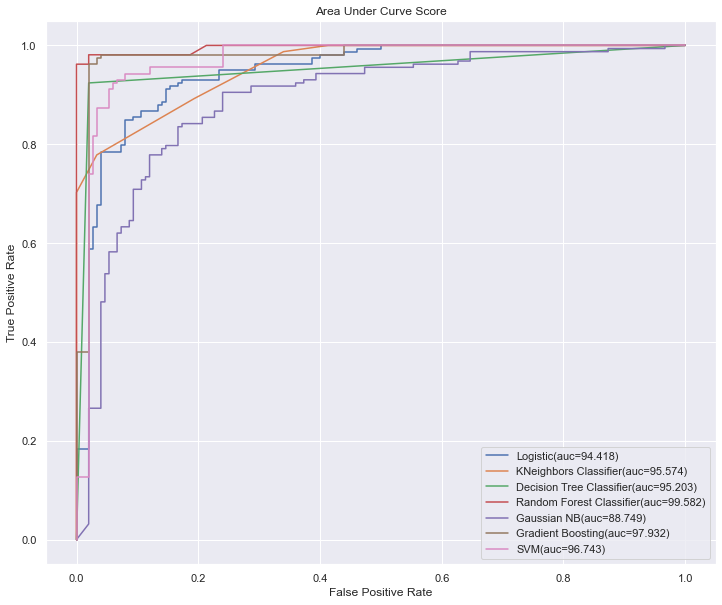

In [108]:
#Finding Roc_Curve and AUC Score for different Algorithms
from sklearn.metrics import roc_curve,auc

lr_fpr,lr_tpr,threshold1=roc_curve(y_test,y_pred_lr[:,1])
auc_lr=auc(lr_fpr,lr_tpr)*100

knc_fpr,knc_tpr,threshold2=roc_curve(y_test,y_pred_knc[:,1])
auc_knc=auc(knc_fpr,knc_tpr)*100

dtc_fpr,dtc_tpr,threshold3=roc_curve(y_test,y_pred_dtc[:,1])
auc_dtc=auc(dtc_fpr,dtc_tpr)*100

rfc_fpr,rfc_tpr,threshold4=roc_curve(y_test,y_pred_rfc[:,1])
auc_rfc=auc(rfc_fpr,rfc_tpr)*100

gnb_fpr,gnb_tpr,threshold5=roc_curve(y_test,y_pred_gnb[:,1])
auc_gnb=auc(gnb_fpr,gnb_tpr)*100

gbc_fpr,gbc_tpr,threshold6=roc_curve(y_test,y_pred_gbc[:,1])
auc_gbc=auc(gbc_fpr,gbc_tpr)*100

svm_fpr,svm_tpr,threshold7=roc_curve(y_test,y_pred_svc)
auc_svm=auc(svm_fpr,svm_tpr)*100

plt.figure(figsize=(12,10))
plt.plot(lr_fpr,lr_tpr,label='Logistic(auc=%0.3f)'%auc_lr)
plt.plot(knc_fpr,knc_tpr,label='KNeighbors Classifier(auc=%0.3f)'%auc_knc)
plt.plot(dtc_fpr,dtc_tpr,label='Decision Tree Classifier(auc=%0.3f)'%auc_dtc)
plt.plot(rfc_fpr,rfc_tpr,label='Random Forest Classifier(auc=%0.3f)'%auc_rfc)
plt.plot(gnb_fpr,gnb_tpr,label='Gaussian NB(auc=%0.3f)'%auc_gnb)
plt.plot(gbc_fpr,gbc_tpr,label='Gradient Boosting(auc=%0.3f)'%auc_gbc)
plt.plot(svm_fpr,svm_tpr,label='SVM(auc=%0.3f)'%auc_svm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve Score')
plt.legend()


Inference
--
For Heart Disease Prediction Dataset,binary classification problem we worked on seven differenet algorithms and we checked for accuracy score and area under curve score,based on our predictions we came to the inference that Random Forest Classifier,Decision Tree Classifier and Gradient Boosting Classifier works well for our training.To optimize our accuracy score we are going for HyperParameter Tuning for the three algorithms and finding our best machine learning algorithm for this use case.

Hyper Parameter Tunning
--

<h3>1. Decision Tree Classifier</h3>

In [109]:
#import random
decision_tree_parameters={
    'max_depth':[1,2,3,4,5,None],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],     
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'min_samples_split':[1,2,3,4,5,6,7,8,9],
    'max_leaf_nodes':[1,2,3,4,5,6,7,None]
}

In [110]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()

#Applying GridSearch CV to find best parameter
optimised_dt=GridSearchCV(estimator=dt,param_grid=decision_tree_parameters,cv=5,n_jobs=-1)

In [111]:
optimised_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [112]:
optimised_dt.best_params_ #Finding best parameter

{'criterion': 'entropy',
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [113]:
dt=DecisionTreeClassifier(splitter='random',
                          max_depth=None,
                          min_samples_split=3,
                          min_samples_leaf=1,
                          max_leaf_nodes=None,
                          criterion='gini')

In [114]:
dt.fit(X_train,y_train) #Fitting the data based on best parameter

DecisionTreeClassifier(min_samples_split=3, splitter='random')

In [115]:
dt.score(X_test,y_test)*100 #Test Dataset Score

98.05194805194806

In [116]:
dt.score(X_train,y_train)*100 #Train Dataset Score

100.0

In [117]:
y_predict=dt.predict(X_test) #Predicting test set results

In [118]:
print('\nConfusion Matrix is: \n' ,confusion_matrix(y_test,y_predict)) #Confusion Matrix
print('\nAccuracy Score is : \n',accuracy_score(y_test,y_predict)*100) #Accuracy Score
tuned_result=classification_report(y_test,y_predict)
print('\nClassification Report is :\n',tuned_result) #Classification Report


Confusion Matrix is: 
 [[150   0]
 [  6 152]]

Accuracy Score is : 
 98.05194805194806

Classification Report is :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



Confusion Matrix for Decision Tree Classifier


Text(0.5, 1.0, 'After HyperParameter Tuning')

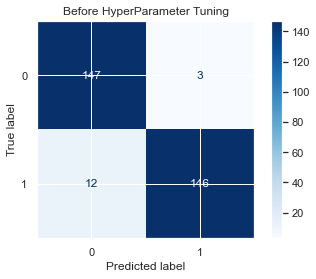

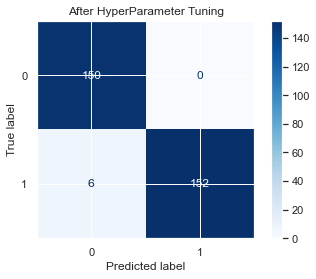

In [119]:
#plt.title("Decision Tree Classifier-Confusion Matrix")
print('Confusion Matrix for Decision Tree Classifier')
plot_confusion_matrix(dct,X_test,y_test,values_format='d',cmap=plt.cm.Blues)
plt.title('Before HyperParameter Tuning')
plot_confusion_matrix(dt,X_test,y_test,values_format='d',cmap=plt.cm.Blues)
plt.title('After HyperParameter Tuning')

<h3>2. Gradient Boosting Classifier</h3>

In [120]:

gradient_boosting_params={
    'loss':['deviance','exponential'],
    'n_estimators':[100,200,300],
    'criterion':['friedman_mse','mse','mae'],
    'min_samples_split':[1,2,3],
    'min_samples_leaf':[1,2,3],
    'max_depth':[3,4,5],
    
}

In [121]:
gb=GradientBoostingClassifier()

#Applying GridSearch CV to find best parameter
optimised_gb=GridSearchCV(estimator=gb,param_grid=gradient_boosting_params,cv=5,n_jobs=-1)

In [122]:
optimised_gb.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200, 300]})

In [123]:
optimised_gb.best_params_ #Finding best parameter

{'criterion': 'friedman_mse',
 'loss': 'deviance',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 300}

In [124]:
gb=GradientBoostingClassifier(criterion='friedman_mse',
                              loss='deviance',
                              max_depth=3,
                              min_samples_leaf=2,
                              min_samples_split=3,
                              n_estimators=300)

In [125]:
gb.fit(X_train,y_train) #Fitting the data based on best parameter

GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=3,
                           n_estimators=300)

In [126]:
gb.score(X_test,y_test)*100 #Test Dataset Score

99.02597402597402

In [127]:
gb.score(X_train,y_train)*100 #Train Dataset Score

100.0

In [128]:
y_predict1=gb.predict(X_test) #Predicting test set results

In [129]:
print('\nConfusion Matrix is: \n' ,confusion_matrix(y_test,y_predict1)) #Confusion Matrix
print('\nAccuracy Score is : \n',accuracy_score(y_test,y_predict1)*100) #Accuracy Score
tuned_result_gb=classification_report(y_test,y_predict1)
print('\nClassification Report is :\n',tuned_result_gb) #Classification Report


Confusion Matrix is: 
 [[150   0]
 [  3 155]]

Accuracy Score is : 
 99.02597402597402

Classification Report is :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



Confusion Matrix for Gradient Boosting Classifier


Text(0.5, 1.0, 'After HyperParameter Tuning')

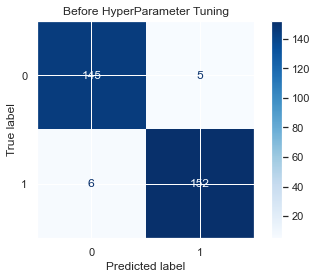

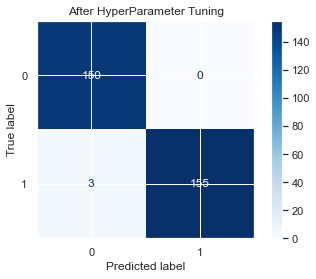

In [130]:
print('Confusion Matrix for Gradient Boosting Classifier')
plot_confusion_matrix(gbc,X_test,y_test,values_format='d',cmap=plt.cm.Blues)
plt.title('Before HyperParameter Tuning')
plot_confusion_matrix(gb,X_test,y_test,values_format='d',cmap=plt.cm.Blues)
plt.title('After HyperParameter Tuning')

<h3>3. Random Forest Classifier</h3>

In [131]:

random_forest_params={
    'n_estimators':[200,500],
    'criterion':['entropy','gini'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,None]
}

In [132]:
rf=RandomForestClassifier()

#Applying GridSearch CV to find best parameter
optimised_rf=GridSearchCV(estimator=rf,param_grid=random_forest_params,cv=5,n_jobs=1)

In [133]:
optimised_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [134]:
optimised_rf.best_params_ #Finding best parameter

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 200}

In [135]:
rf=RandomForestClassifier(criterion='gini',
                          max_depth=None,
                          max_features='sqrt',
                          n_estimators=500)

In [136]:
rf.fit(X_train,y_train) #Fitting the data based on best parameter

RandomForestClassifier(max_features='sqrt', n_estimators=500)

In [137]:
rf.score(X_test,y_test)*100 #Test Dataset Score

99.02597402597402

In [138]:
rf.score(X_train,y_train)*100 #Train Dataset Score

100.0

In [139]:
y_predict2=rf.predict(X_test) #Predicting test set results

In [140]:
print('\nConfusion Matrix is: \n' ,confusion_matrix(y_test,y_predict2)) #Confusion Matrix
print('\nAccuracy Score is : \n',accuracy_score(y_test,y_predict2)*100) #Accuracy Score
tuned_result_rf=classification_report(y_test,y_predict2)
print('\nClassification Report is :\n',tuned_result_rf) #Classification Report


Confusion Matrix is: 
 [[150   0]
 [  3 155]]

Accuracy Score is : 
 99.02597402597402

Classification Report is :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



Confusion Matrix for Random Forest Classifier


Text(0.5, 1.0, 'After HyperParameter Tuning')

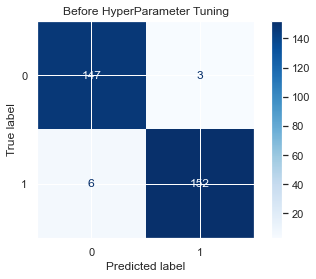

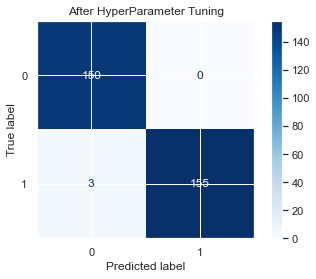

In [141]:
print('Confusion Matrix for Random Forest Classifier')
plot_confusion_matrix(rfc,X_test,y_test,values_format='d',cmap=plt.cm.Blues)
plt.title('Before HyperParameter Tuning')
plot_confusion_matrix(rf,X_test,y_test,values_format='d',cmap=plt.cm.Blues)
plt.title('After HyperParameter Tuning')

Calculating Area Under Curve Score after HyperParameter Tuning
--

Average Threshold Value for Random Forest 0.52
Average Threshold Value for Gradient Boosting 0.51


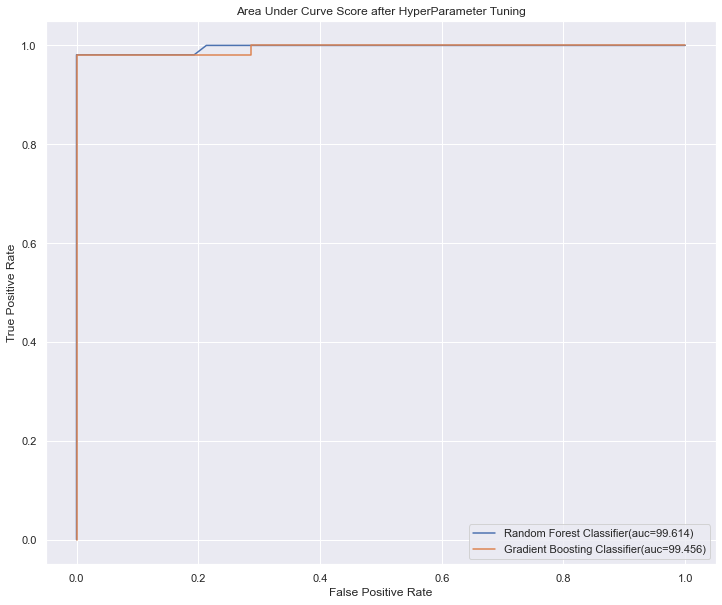

In [142]:
#optimised_y_pred_dtc=dt.predict_proba(X_test)
optimised_y_pred_rfc=rf.predict_proba(X_test)
optimised_y_pred_gbc=gb.predict_proba(X_test)

'''optimised_dt_fpr,optimised_dt_tpr,threshold_1=roc_curve(y_test,optimised_y_pred_dtc[:,1])
optimised_auc_dt=auc(optimised_dt_fpr,optimised_dt_tpr)*100'''

optimised_rf_fpr,optimised_rf_tpr,threshold_2=roc_curve(y_test,optimised_y_pred_rfc[:,1])
optimised_auc_rf=auc(optimised_rf_fpr,optimised_rf_tpr)*100
print('Average Threshold Value for Random Forest',round(threshold_2.mean(),2))

optimised_gb_fpr,optimised_gb_tpr,threshold_3=roc_curve(y_test,optimised_y_pred_gbc[:,1])
optimised_auc_gbc=auc(optimised_gb_fpr,optimised_gb_tpr)*100
print('Average Threshold Value for Gradient Boosting',round(threshold_3.mean(),2))

plt.figure(figsize=(12,10))
#plt.plot(optimised_dt_fpr,optimised_dt_tpr,label='Decision Tree Classifier(auc=%0.3f)'%optimised_auc_dt)
plt.plot(optimised_rf_fpr,optimised_rf_tpr,label='Random Forest Classifier(auc=%0.3f)'%optimised_auc_rf)
plt.plot(optimised_gb_fpr,optimised_gb_tpr,label='Gradient Boosting Classifier(auc=%0.3f)'%optimised_auc_gbc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve Score after HyperParameter Tuning')
plt.legend()


Inference
--
After performing HyperParameter Tuning,for three different algorithms Decision Tree Classifier,Random Forest Classifier,Gradient Boosting Classifier.These models gave better accuracy score than before performing HyperParameter Tuning.Random Forest classifier and Gradient Boosting Classifier gave almost equal accuracy score so we decided to perform Area Under Curve Score for those two algorithms.In that,Random Forest gave slightly better accuracy than Gradient Boosting Classifier so we decided that the Random Forest Classifier would be better for this use case.

Performing Cross Validation Score on our final selected algorithm (Random Forest Classifier)
--

In [143]:
from sklearn.model_selection import cross_val_score
cross_score=cross_val_score(rf,X,y,cv=5)
print('Random Forest Classifier Score is ',cross_score.mean()*100)
print('Standard Deviation is',cross_score.std())
print('Minimum Accuracy Score',cross_score.min()*100)
print('Maximum Accuracy Score',cross_score.max()*100)
print('List of Accuracy Score is',cross_score)


Random Forest Classifier Score is  99.1219512195122
Standard Deviation is 0.007169238271560528
Minimum Accuracy Score 98.53658536585365
Maximum Accuracy Score 100.0
List of Accuracy Score is [1.         1.         0.98536585 0.98536585 0.98536585]


Visualising the Accurcay Score after performing Cross Validation 
--

(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([0.98536585, 0.98682927, 0.98829268, 0.9897561 , 0.99121951,
        0.99268293, 0.99414634, 0.99560976, 0.99707317, 0.99853659,
        1.        ]),
 <BarContainer object of 10 artists>)

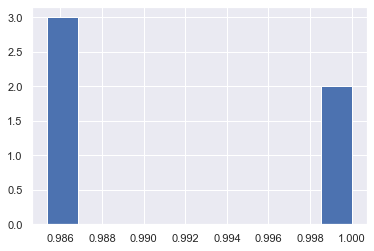

In [144]:
plt.hist(x=cross_score)

Conclusion
--

Our project is based on Health Care domain(Heart Diseases Predicton).Considering the Threshold value is very much important for Health Care Domain so by the help of Roc Auc Curve we found threshold values for two different algorithms and their average mean is almost nearer to 0.5.Based on Roc Auc score we came to know that the Random Forest Classifier will perform better for the given use case.
<p>Threshold value > 0.5 (Affected 1)</p>
<p>Threshold value < 0.5 (Affected 0)</p>

Save the Model
--

In [147]:
import pickle as pkl

In [148]:
pkl.dump(rf,open('heart_prediction.pkl','wb'))